In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import floor

drop_attribs = [
    "Player Name",             
    "injury_status",           
    "team",                    
    "opp",                     
    "spread",                
    "over_under",              
    "implied_team_score",      
    "L5_dvp_rank",             
    "L5_ppg_floor",            
    "L5_ppg_avg",              
    "L5_ppg_max",              
    "Pos",                    
    "Salary",                  
    "Rest",                    
    "Opp Pace",                
    "Opp DEff",               
    "Opp DvP",                 
    "L2 FGA",                  
    "L5 FGA",               
    "S FGA", 
    "L2 Min",                 
    "L5 Min",                  
    "S Min",                   
    "L5 FP",                   
    "S FP",                    
    "Floor FP",                
    "Ceil FP",                 
    "Actual Min",             
    "Actual FP",               
    "Actual Val",            
    "FantasyFuelPPGProj",      
    "FantasyFuelValueProj", 
    "DFN_PPGProj",      
    "DFN_MinProj",          
    "DFN_ValueProj",          
]

In [163]:
def openBestLineupsForDate():
    file_name = 'BestLineups/2020-02-01'
    file = pd.read_csv(file_name,index_col=[0,1], skipinitialspace=True)
    return file
def openCreatedLineupsForDate():
    file_name = 'BestCreatedLineupsFocused/2020-02-01'
    file = pd.read_csv(file_name,index_col=[0,1], skipinitialspace=True)
    return file

In [164]:
def dropLowScoringLineups(file):
    drop_level = file.groupby(['Lineup Num'])['Actual FP'].sum().mean() - file.groupby(['Lineup Num'])['Actual FP'].sum().std()
    group = file.groupby(['Lineup Num'])
    return group.filter(lambda x: x['Actual FP'].sum() > drop_level)

def plotLineupActualFP(file):
    file.groupby(['Lineup Num'])['Actual FP'].sum().plot(style='.')
    print(file.groupby(['Lineup Num'])['Actual FP'].sum().mean())
    print(file.groupby(['Lineup Num'])['Actual FP'].sum().max())
    
def plotLineupProjectedFP(file, projectionType):
    file.groupby(['Lineup Num'])[projectionType].sum().plot(style='.')
    


In [165]:
actual = openBestLineupsForDate()
created = openCreatedLineupsForDate()

350.40000000000003
379.40000000000003


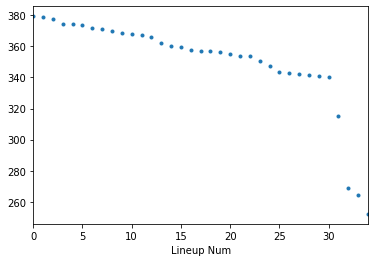

In [166]:
actual = dropLowScoringLineups(actual)
plotLineupActualFP(actual)

273.4666666666667
307.1


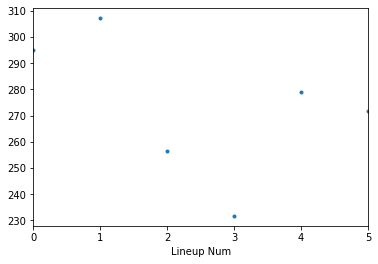

In [167]:
plotLineupActualFP(created.loc[:5])

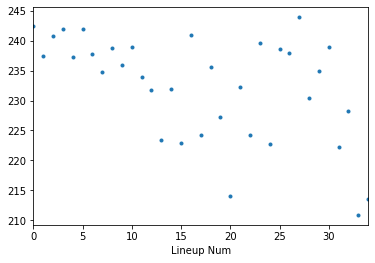

In [159]:
plotLineupProjectedFP(actual, "FantasyFuelPPGProj")

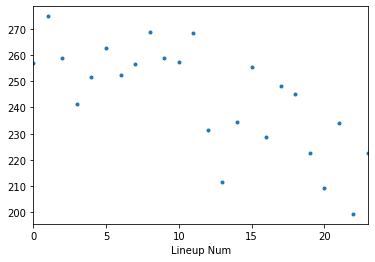

In [160]:
plotLineupProjectedFP(created, 'Avg Proj')

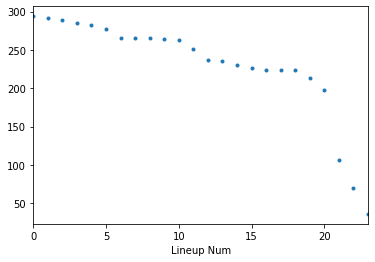

In [161]:
plotLineupProjectedFP(created, 'Selected')

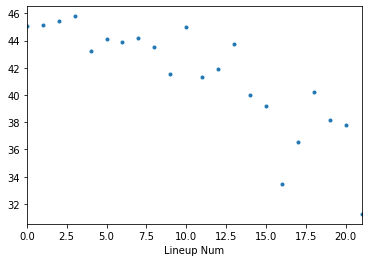

In [138]:
plotLineupProjectedFP(created, 'Avg Value Proj')

In [139]:
actual.loc[0]['Actual FP'].sum()

378.4

In [140]:
created.loc[0]['Actual FP'].sum()

294.8

In [141]:
a = set(actual['Player Name'].value_counts().keys().tolist())
b = set(created['Player Name'].value_counts().keys().tolist())
print(a.intersection(b))

{'Zion Williamson', 'Jevon Carter', 'Deandre Ayton', 'Josh Hart', 'Zach LaVine', 'Serge Ibaka', 'Cheick Diallo', 'Patrick McCaw', 'Shaquille Harrison', 'Thaddeus Young', 'Wesley Matthews', 'Luke Kornet', 'Giannis Antetokounmpo', 'Ersan Ilyasova', 'Chris Boucher', 'Devin Booker', 'Kelly Oubre Jr.', 'James Harden', "E'Twaun Moore", 'Danuel House Jr.', 'Terence Davis', 'Lonzo Ball', 'Eric Gordon', 'Ben McLemore', 'Pat Connaughton', 'Brook Lopez', 'Mikal Bridges', 'Coby White', 'Brandon Ingram', 'Jrue Holiday'}


In [142]:
a.symmetric_difference(b)

{'Austin Rivers',
 'Chandler Hutchison',
 'Denzel Valentine',
 'Derrick Favors',
 'Donte DiVincenzo',
 'Eric Bledsoe',
 'Fred VanVleet',
 'JJ Redick',
 'Jaxson Hayes',
 'Khris Middleton',
 'Kyle Korver',
 'Kyle Lowry',
 'Matt Thomas',
 'OG Anunoby',
 'P.J. Tucker',
 'Pascal Siakam',
 'Robin Lopez',
 'Russell Westbrook',
 'Ryan Arcidiacono',
 'Sterling Brown',
 'Thabo Sefolosha',
 'Tyler Johnson'}

In [143]:
a.difference(b)

{'Chandler Hutchison',
 'Denzel Valentine',
 'Fred VanVleet',
 'Khris Middleton',
 'Kyle Lowry',
 'OG Anunoby',
 'Ryan Arcidiacono',
 'Thabo Sefolosha',
 'Tyler Johnson'}

In [144]:
actual['Player Name'].value_counts()

Terence Davis            28
James Harden             26
Giannis Antetokounmpo    26
Brook Lopez              23
Josh Hart                19
Brandon Ingram           12
Danuel House Jr.         12
Lonzo Ball               11
Ben McLemore             10
Chandler Hutchison        9
Chris Boucher             6
Zion Williamson           4
Kelly Oubre Jr.           4
Deandre Ayton             4
Thaddeus Young            3
Pat Connaughton           3
Serge Ibaka               3
Shaquille Harrison        2
Luke Kornet               2
Ryan Arcidiacono          2
E'Twaun Moore             2
Devin Booker              2
Zach LaVine               2
Cheick Diallo             2
Kyle Lowry                1
Jevon Carter              1
Wesley Matthews           1
Fred VanVleet             1
Jrue Holiday              1
Denzel Valentine          1
Patrick McCaw             1
Khris Middleton           1
Tyler Johnson             1
Eric Gordon               1
Coby White                1
Mikal Bridges       

In [145]:
created.loc[:15]['Player Name'].value_counts()

James Harden             15
Chris Boucher            14
Mikal Bridges            14
Kelly Oubre Jr.          14
Brandon Ingram           14
Terence Davis             8
Zion Williamson           8
Donte DiVincenzo          7
JJ Redick                 5
Ben McLemore              5
Russell Westbrook         3
Cheick Diallo             3
Coby White                2
Pascal Siakam             2
Eric Gordon               2
Luke Kornet               1
Eric Bledsoe              1
Patrick McCaw             1
Shaquille Harrison        1
Danuel House Jr.          1
E'Twaun Moore             1
Kyle Korver               1
Jevon Carter              1
P.J. Tucker               1
Giannis Antetokounmpo     1
Pat Connaughton           1
Sterling Brown            1
Name: Player Name, dtype: int64

In [150]:
created.loc[0]

,Player Name,position,injury_status,game_date,team,opp,spread,over_under,implied_team_score,salary,...,Proj Min Enhanced,Proj FPP Per Min,Proj Pts Scored,Avg Proj Stan,DFN_MinProj Stan,Proj Min Enhanced Stan,Proj FPP Per Min Stan,Proj Pts Scored Stan,Selected,Selected Stan
0,Donte DiVincenzo,PG,NaN,2020-02-02,MIL,PHO,NaN,NaN,NaN,4000,...,23.989726,0.934000,NaN,-0.076121,0.150104,-0.043399,0.191754,NaN,30.0,0.851203
1,Ben McLemore,SG,NaN,2020-02-02,HOU,NO,-5.5,245.0,125.3,3200,...,16.300000,0.776190,20.048,-0.529875,-0.175121,-0.507665,-0.160427,-0.451738,24.0,0.425601
2,Mikal Bridges,SG,NaN,2020-02-02,PHO,MIL,NaN,NaN,NaN,4000,...,28.604670,0.728986,NaN,0.039731,0.922513,0.235227,-0.265774,NaN,51.0,2.340808
3,Brandon Ingram,SF,NaN,2020-02-02,NO,HOU,5.5,245.0,119.8,7100,...,44.055319,1.194118,34.742,1.034130,0.881859,1.168057,0.772256,1.288863,47.0,2.057073
4,James Harden,PG,NaN,2020-02-02,HOU,NO,-5.5,245.0,125.3,11200,...,64.171875,1.750000,46.361,2.588481,1.125778,2.382591,2.012812,2.665210,67.0,3.475745
5,Kelly Oubre Jr.,SF,NaN,2020-02-02,PHO,MIL,NaN,NaN,NaN,6400,...,37.422857,0.956757,NaN,0.699445,1.125778,0.767624,0.242540,NaN,39.0,1.489605
6,Zion Williamson,PF,NaN,2020-02-02,NO,HOU,5.5,245.0,119.8,7700,...,44.193987,1.337288,NaN,0.960113,0.515982,1.176430,1.091767,NaN,37.0,1.347738
7,Chris Boucher,PF,NaN,2020-02-02,TOR,CHI,-10.5,217.0,113.8,3300,...,22.740000,1.184375,21.622,-0.359315,-0.581652,-0.118851,0.750513,-0.265288,41.0,1.631472


In [102]:
344.3
373.2

245 -> 244
316.7 -> 333


360
386

277 - 291
364 - 367


SyntaxError: invalid syntax (<ipython-input-102-f777b87b0aa6>, line 4)